In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils


# tells matplotlib to embed plots within the notebook
%matplotlib inline

# 1 Multi-class Classification

## 1.1 Dataset

In [2]:
# each input is 20x20 pixel value
input_layer_size = 400

num_labels = 10

data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = data['X']
y = data['y'].ravel()
y[y==10] = 10
m = y.size

## 1.2 Visualizing the data

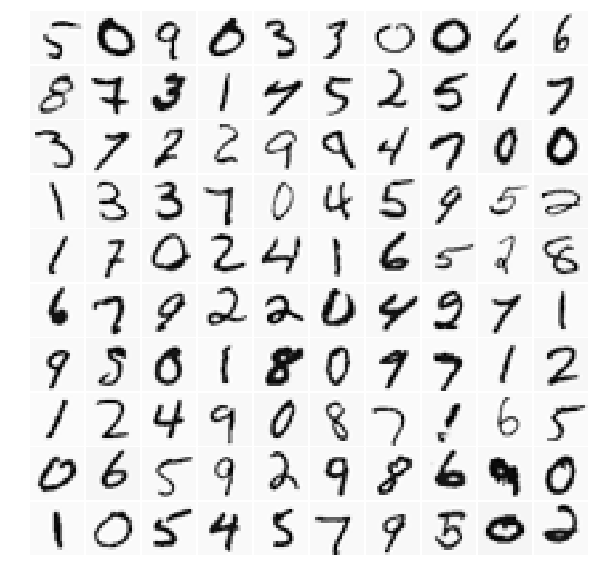

In [4]:
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
utils.displayData(sel)

## 1.3 Vectorizing Logistic Regression

In [5]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [6]:
X_t.T

array([[1. , 1. , 1. , 1. , 1. ],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.6, 0.7, 0.8, 0.9, 1. ],
       [1.1, 1.2, 1.3, 1.4, 1.5]])

In [7]:
np.dot(utils.sigmoid(np.dot(X_t, theta_t)),1-y_t)

1.4967844856675625

In [8]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
        
    J = 0
    grad = np.zeros(theta.shape)
    
    h = utils.sigmoid(np.dot(X, theta))
    J = -1/m*(np.dot(np.log(h),y) + np.dot(np.log(1-h), 1-y)) + lambda_/2/m*np.sum(np.square(theta[1:]))
    grad = 1/m*np.dot(X.T, h - y) + lambda_/m*theta
    grad[0] = grad[0] - lambda_/m*theta[0]
    
    return J, grad

In [9]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');


Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


## 1.4 One-vs-all Classification

In [18]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m,1)), X], axis = 1)
    

    
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter':100}
        res = optimize.minimize(lrCostFunction, initial_theta, (X, (y == c), lambda_), 
                                jac=True, method='TNC', options=options)
        all_theta[c] = res.x
        
    return all_theta

In [19]:
lambda_ = 0.1
all_theta  = oneVsAll(X, y, num_labels, lambda_)

In [20]:
all_theta.shape

(10, 401)

In [23]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    probs = utils.sigmoid(np.dot(X, all_theta.T))
    p = np.argmax(probs, axis=1)
    return p

In [24]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 86.48%


# 2 Neural Networks

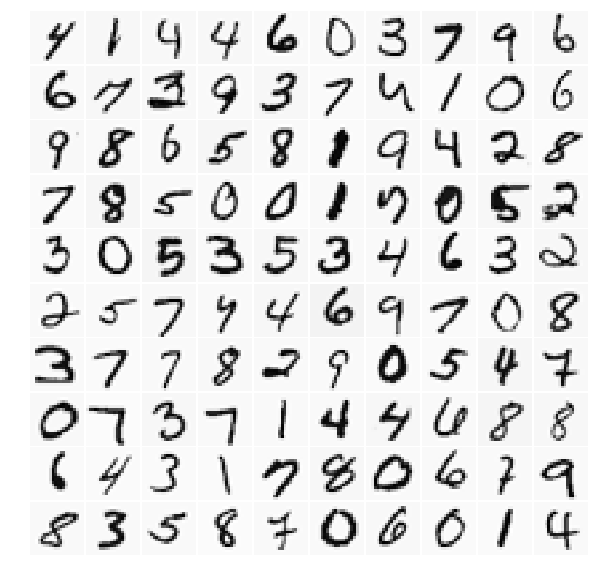

In [26]:
#  training data stored in arrays X, y
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# get number of examples in dataset
m = y.size

# randomly permute examples, to be used for visualizing one 
# picture at a time
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)


In [27]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

weights = loadmat('ex3weights.mat')

Theta1, Theta2 = weights['Theta1'], weights['Theta2']


In [28]:
Theta1.shape

(25, 401)

In [29]:
Theta2.shape

(10, 26)

In [30]:
Theta2 = np.roll(Theta2, 1, axis=0)

In [31]:
Theta2.shape

(10, 26)

In [32]:
X.shape

(5000, 400)

In [35]:
def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = X[None]
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    z2 = np.dot(X, Theta1.T)
    a2 = utils.sigmoid(z2)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
    
    z3 = np.dot(a2, Theta2.T)
    a3 = utils.sigmoid(z3)
    
    p = np.argmax(a3, axis=1)
    
    return p
    

In [36]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 97.5%


Neural Network Prediction: 1


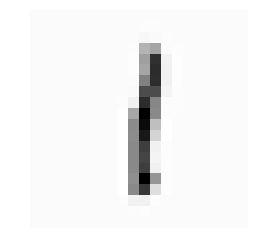

In [39]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')